# Windows下pytorch安装
## 1.安装anaconda
* 安装网址： https://repo.anaconda.com/archive/Anaconda3-2022.05-Windows-x86_64.exe

## 2.创建虚拟环境
* 进入开始菜单栏，打开 anaconda prompt
* 创建名为pytorch的虚拟环境：`conda create -n pytorch python=3.8`
* 进入新环境：`conda activate pytorch`

## 3.安装pytorch
* 输入：`nvidia-smi` 看电脑上GPU的CUDA版本
* 进入pytorch官网选择合适版本pytorch进行安装 https://pytorch.org/get-started/locally/
* 建议有GPU使用 `conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch`
* 建议无GPU使用 `conda install pytorch torchvision torchaudio cpuonly -c pytorch`
* 安装完成后 输入`python` 再输入`import torch` 不报错即为安装成功

## 4.打开Jupiter
* 在pytorch虚拟环境下输入 `jupyter notebook` 

In [1]:
import torch

# Tensor 
## 1.Initializing a Tensor

In [2]:
#from data
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [3]:
#from another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6983, 0.2882],
        [0.1636, 0.8911]]) 



In [4]:
#with random values
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1967, 0.7172, 0.0344],
        [0.8551, 0.6584, 0.5576]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## 2.Attributes of a Tensor

In [5]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## 3.Operations on Tensors

In [6]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [7]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [8]:
#concatenate a sequence of tensors along a given dimension
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [13]:
# matrix multiplication & element-wise product
tensor = torch.Tensor([1,2])
y = tensor @ tensor
z = tensor * tensor
print(f"matrix multiplication: {y}")
print(f"element-wise product: {z}")

matrix multiplication: 5.0
element-wise product: tensor([1., 4.])


# dataset & dataloader
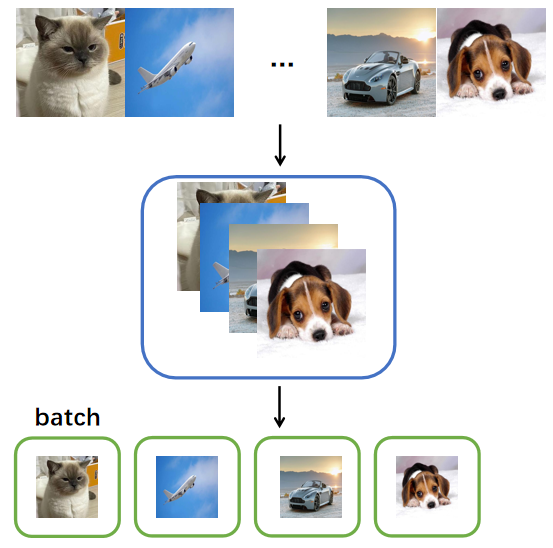

In [14]:
#offical dataset
import torchvision
train_data = torchvision.datasets.CIFAR10(root="‪C_/Users/xsswh/Desktop", train=True, transform=torchvision.transforms.ToTensor(),
                                         download=True)
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)

NameError: name 'torchvision' is not defined

In [15]:
# example for custom dataset
class MyData(Dataset):

    def __init__(self, root_dir, image_dir, label_dir, transform):
        self.root_dir = root_dir
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.label_path = os.path.join(self.root_dir, self.label_dir)
        self.image_path = os.path.join(self.root_dir, self.image_dir)
        self.image_list = os.listdir(self.image_path)
        self.label_list = os.listdir(self.label_path)
        self.transform = transform
        
        self.image_list.sort()
        self.label_list.sort()

    def __getitem__(self, idx):
        img_name = self.image_list[idx]
        label_name = self.label_list[idx]
        img_item_path = os.path.join(self.root_dir, self.image_dir, img_name)
        label_item_path = os.path.join(self.root_dir, self.label_dir, label_name)
        img = Image.open(img_item_path)

        with open(label_item_path, 'r') as f:
            label = f.readline()

        # img = np.array(img)
        img = self.transform(img)
        sample = {'img': img, 'label': label}
        return sample

    def __len__(self):
        assert len(self.image_list) == len(self.label_list)
        return len(self.image_list)


NameError: name 'Dataset' is not defined

# Network

In [17]:
# example for neural network
import torch
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 5, 1, 2),
            nn.MaxPool2d(2), 
            nn.Conv2d(32, 32, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64*4*4, 64),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        output = self.model(x)
        return output


# Train
*若没有GPU，去掉所有.to(device)

In [30]:
import torch
import torchvision

from torch import nn
from torch.utils.data import DataLoader


# 定义训练GPU设备
device = torch.device("cuda")

#定义dataset
train_data = torchvision.datasets.CIFAR10(root="./Desktop", train=True, transform=torchvision.transforms.ToTensor(),
                                         download=True)
                                         
# 利用 DataLoader 来加载数据集
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)

# length 长度
train_data_size = len(train_data)

# 如果train_data_size=10, 训练数据集的长度为：10
print("训练数据集的长度为：{}".format(train_data_size))

# 创建网络模型
net = Net()
net = net.to(device)

# 损失函数
loss_fn = nn.CrossEntropyLoss()
loss_fn = loss_fn.to(device)

# 优化器
# learning_rate = 0.01
learning_rate = 1e-2
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

# 设置训练网络的一些参数
# 记录训练的次数
total_train_step = 0

# 训练的轮数
epoch = 10

#开始训练
for i in range(epoch):
    print("-------第 {} 轮训练开始-------".format(i+1))
    
    total_loss = 0
    # 训练步骤开始
    net.train()
    for data in train_dataloader:
        imgs, targets = data
        imgs = imgs.to(device)
        targets = targets.to(device)
        outputs = net(imgs)
        loss = loss_fn(outputs, targets)
        total_loss =  total_loss + loss.item()
        
        # 优化器优化模型
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_step = total_train_step + 1
        if total_train_step % 100 == 0:
            print("训练次数：{}, Loss: {}".format(total_train_step, loss.item()))
            
    
# save model
torch.save(net, "./Desktop/model.pth")
print("模型已保存")


Files already downloaded and verified
训练数据集的长度为：50000
-------第 1 轮训练开始-------
训练次数：100, Loss: 2.3045949935913086
训练次数：200, Loss: 2.2923152446746826
训练次数：300, Loss: 2.279914617538452
训练次数：400, Loss: 2.2203924655914307
训练次数：500, Loss: 2.1280415058135986
训练次数：600, Loss: 2.0319857597351074
训练次数：700, Loss: 2.0037670135498047
模型已保存


# Test

In [35]:
import torch
import torchvision


from torch import nn
from torch.utils.data import DataLoader

device = torch.device("cuda")
test_data = torchvision.datasets.CIFAR10(root="./Desktop", train=False, transform=torchvision.transforms.ToTensor(),
                                         download=True)
test_dataloader = DataLoader(test_data, batch_size=64)

# load net
net = torch.load('./Desktop/model.pth')
net = net.to(device)

# test
net.eval()
total_test_loss = 0
total_accuracy = 0
with torch.no_grad():
    for data in test_dataloader:
        imgs, targets = data
        imgs = imgs.to(device)
        targets = targets.to(device)
        outputs = net(imgs)
        
        accuracy = (outputs.argmax(1) == targets).sum()
        total_accuracy = total_accuracy + accuracy

print("test accuracy: {}".format(total_accuracy/len(test_data)))

Files already downloaded and verified
test accuracy: 0.296999990940094
